## Midterm BME 502 2025

In this midterm exam, you are tasked to develop a method to tell whether data is better described by a line fit or a sigmoidal fit.

In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks`


In [2]:
Pkg.add(["Plots","Distributions","Random","Statistics","NonlinearSolve","ForwardDiff"])

   Resolving package versions...
  No Changes to `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Project.toml`
  No Changes to `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Manifest.toml`


In [1]:
using Plots, Distributions, Random, Statistics, NonlinearSolve, ForwardDiff, LinearAlgebra

In [2]:
line_fit(x,p) = p[1] .+ p[2] .* x

line_fit (generic function with 1 method)

In [3]:
sigmoid_fit(x,p) = p[1] .+ p[2] ./ (1 .+ exp.(-p[3]*(x .- p[4])))

sigmoid_fit (generic function with 1 method)

Let's create some plots to see how these functions look

In [4]:
x = 0:0.1:10

0.0:0.1:10.0

In [5]:
y_line = line_fit(x,[2,0.5])

2.0:0.05:7.0

In [6]:
y_sigmoid = sigmoid_fit(x,[2.5,3.5,0.1,5.5])

101-element Vector{Float64}:
 3.7805254314621974
 3.788656537923644
 3.796809108114118
 3.8049828179038157
 3.8131773393604975
 3.8213923407935093
 3.8296274867991844
 3.837882438307629
 3.8461568526308625
 3.854450383512326
 ⋮
 4.57010642451473
 4.5785558602695
 4.586989447538757
 4.595406810393582
 4.603807575969294
 4.612191374526542
 4.620557839511163
 4.6289066076128
 4.637237318822277

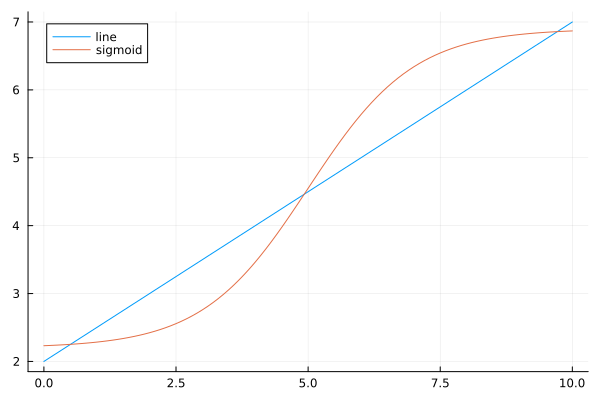

In [7]:
y_line = line_fit(x,[2,0.5])
y_sigmoid = sigmoid_fit(x,[2.2,4.7,1,5.0])
plot(x, y_line, label = "line")
plot!(x, y_sigmoid, label = "sigmoid")

Let us add some serious noise to it

In [8]:
nd = Normal(0,5)
x_line = 10*rand(200)
y_line_n = line_fit(x_line,[2,0.5]) .+ rand(nd,length(x_line))
x_sigmoid = 10*rand(200)
y_sigmoid_n = sigmoid_fit(x_sigmoid,[2.2,4.7,1,5.0]) .+ rand(nd,length(x_sigmoid))

200-element Vector{Float64}:
  9.46266161944041
  6.36967240648596
  8.815233024643128
 -4.070721641005627
 12.94497382575999
  1.9564077518473155
 10.62539755944234
  3.190838129907336
 -0.9644022034973658
 -3.535615389310662
  ⋮
  3.012491071033286
 10.544112012836703
  6.225603901941101
  1.0978372715382445
  7.7155418572734185
  1.3676679460877184
  7.986584209238018
 -3.881172550000247
  9.695021814132883

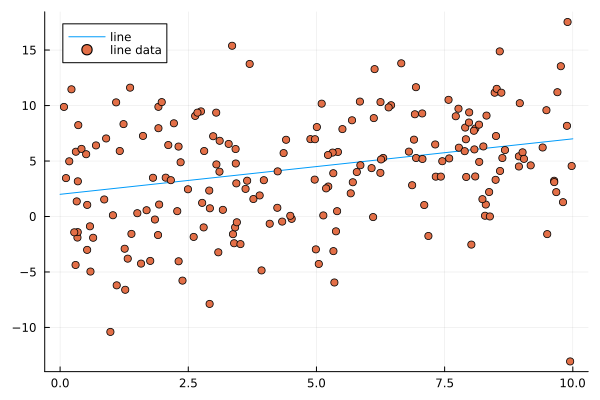

In [9]:
plot(x, y_line, label = "line")
scatter!(x_line, y_line_n, label = "line data")

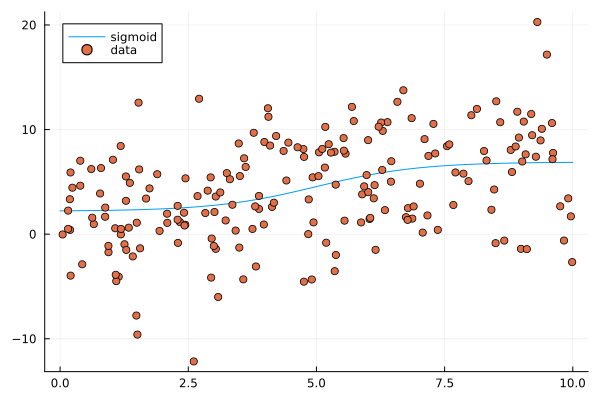

In [10]:
plot(x, y_sigmoid, label = "sigmoid")
scatter!(x_sigmoid, y_sigmoid_n, label = "data")

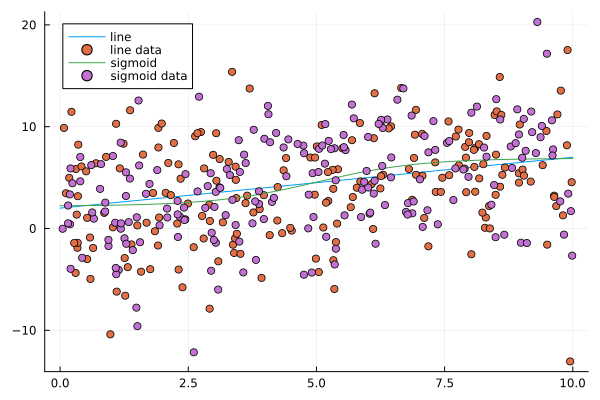

In [11]:
# let's plot it all together
plot(x, y_line, label = "line")
scatter!(x_line, y_line_n, label = "line data")
plot!(x, y_sigmoid, label = "sigmoid")
scatter!(x_sigmoid, y_sigmoid_n, label = "sigmoid data")

# Question:

If you take the sigmoid data, which fit is better? The linear or sigmoid?

How uncertain are the parameters?

At what noise level are the two fits equally likely?

In [493]:
#GENERAL FUNCTIONS
# Estimation of sigma if it is not given
function sigma_estimate
    if isempty(sigma)
        # Calculate residuals and use their standard deviation as the error estimate
        residuals = local_residuals(p_fit)
    
        # Estimate sigma as the std of residuals (least squares)
        sigma_value = std(residuals)
        sigma = sigma_value * ones(length(x))  # Assign sigma for each data point
    
        println("Estimated sigma: ", sigma[1])
    end
end

Base.Meta.ParseError: ParseError:
# Error @ c:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X55sZmlsZQ==.jl:3:10
# Estimation of sigma if it is not given
function sigma_estimate
#        └────────────┘ ── Invalid signature in function definition

# Part 1 (20 points)
Create a function line_fitting(x,y; sigma=[]) that returns the best parameters and the covariance matrix.  The standard deviation of the measurement error, sigma, can be supplied as a number (assuming that all measurements share the same error) or as a vector with the same length as y. If sigma (standard deviation of measurement error) is not specified (sigma=[]), estimate the measurement error using the sum of least squares to estimate $\mathcal{X}^2$.

In [ ]:
function line_fitting(x, y; sigma=[])
    #Parameters initial guess
    p0 = [1.0, 2.0]

    #Fit the model to the data
    fit = curve_fit(line_fit, x, y, p0)
    #Best-fit parameters
    p_fit = fit.param 

    #Define the residuals function
    local_residuals(p) = y .- line_fit(x, p)

    #Estimation of sigma if it is not given
    if isempty(sigma)
        #Calculate residuals and use their standard deviation as the error estimate
        residuals = local_residuals(p_fit)
        
        #Estimate sigma as the std of residuals (least squares)
        sigma_value = std(residuals)
        sigma = sigma_value * ones(length(x))  # Assign sigma for each data point
        
        println("Estimated sigma: ", sigma[1])
    end
    
    #Calculate chi-squared
    chi2 = p -> sum((local_residuals(p) ./ sigma).^2)

    #Hessian matrix
    hess = ForwardDiff.hessian(chi2, p_fit)
    
    #Covariance matrix (inverse of the Hessian matrix)
    covariance_matrix = inv(2 * hess)
    
    #Errors (standard deviations of the parameters)
    errors = sqrt.(diag(covariance_matrix))
    
    #Final chi-squared value
    chi2_val = chi2(p_fit)

    return p_fit, covariance_matrix, chi2_val, errors
end


line_fitting (generic function with 2 methods)

In [455]:
x = 10 .* rand(200)
intercept = p_fit[2]
slope = p_fit[1]
y_exp = p[1] .* x .+ p[2] .+ 0.1 .* randn(length(x))

#Call the line_fitting function with the data (if sigma is not specified, the estimated sigma will be shown)
p_fit, covariance_matrix, chi2_val, errors = line_fitting(x, y_exp, 0.5)

println("Parameters: ", p_fit)
println("Covariance Matrix: ", covariance_matrix)
println("Chi2 value: ", chi2_val)
println("Errors: ", errors)
reduced_chi2 = chi2_val ./ (length(y_exp) .- length(p_fit))
println("Reduced chi-squared: ", reduced_chi2)


Parameters: [1.0138927826437036, 1.99851594282307]
Covariance Matrix: [0.0012587257771312576 -0.0001881992538592874; -0.0001881992538592874 3.7431826535707764e-5]
Chi2 value: 8.105422428937548
Errors: [0.03547852557718905, 0.0061181554847607265]
Reduced chi-squared: 0.040936476913826


# Part 2 (20 points)
Similarily, create a function sigmoid_fitting(x,y; sigma=[]) that returns the best parameters and the covariance matrix. Treat sigma the same way as in Part 1.

In [ ]:
# Sigmoid function definition (based on the new equation)
sigmoid_fit(x, p) = p[1] .+ p[2] ./ (1 .+ exp.(-p[3] .* (x .- p[4])))

function sigmoid_fitting(x, y; sigma=[])
    # Initial guess for parameters [offset, scale, steepness, midpoint]
    p0 = [0.0, 1.0, 1.0, 5.0]  # Adjust initial guess as needed

    # Fit the model to the data
    fit = curve_fit(sigmoid_fit, x, y, p0)
    # Best-fit parameters
    p_fit = fit.param 

    # Define the residuals function
    local_residuals(p) = y .- sigmoid_fit(x, p)  # Use sigmoid_fit here

    # Estimation of sigma if it is not given
    if isempty(sigma)
        # Calculate residuals and use their standard deviation as the error estimate
        residuals = local_residuals(p_fit)
        
        # Estimate sigma as the std of residuals (least squares)
        sigma_value = std(residuals)
        sigma = sigma_value * ones(length(x))  # Assign sigma for each data point
        
        println("Estimated sigma: ", sigma[1])
    end
    
    # Calculate chi-squared
    chi2 = p -> sum((local_residuals(p) ./ sigma).^2)

    # Compute Hessian matrix using ForwardDiff
    hess = ForwardDiff.hessian(chi2, p_fit)
    
    # Covariance matrix (inverse of the Hessian matrix)
    covariance_matrix = inv(2 * hess)
    
    # Errors (standard deviations of the parameters)
    errors = sqrt.(diag(covariance_matrix))
    
    # Final chi-squared value
    chi2_val = chi2(p_fit)

    return p_fit, covariance_matrix, chi2_val, errors
end


sigmoid_fitting (generic function with 1 method)

In [506]:
x = 10 .* rand(200)
p = [2.0, 1.0, 3.0, 5.0]  # Example parameters for the sigmoid model
y_exp = p[1] .+ p[2] ./ (1 .+ exp.(-p[3] .* (x .- p[4]))) .+ 0.1 .* randn(length(x))

# Call the sigmoid_fitting function with the data (if sigma is not specified, the estimated sigma will be shown)
p_fit, covariance_matrix, chi2_val, errors = sigmoid_fitting(x, y_exp)

println("Parameters: ", p_fit)
println("Covariance Matrix: ", covariance_matrix)
println("Chi2 value: ", chi2_val)
println("Errors: ", errors)
reduced_chi2 = chi2_val / (length(y_exp) - length(p_fit))
println("Reduced chi-squared: ", reduced_chi2)


Estimated sigma: 0.10281245624172211
Parameters: [2.009958366259896, 0.9838442842989223, 3.1830197867872285, 5.003450414384716]
Covariance Matrix: [3.258230382922766e-5 -3.383667033567377e-5 0.00022374573709044973 2.7819806187750688e-5; -3.383667033567377e-5 6.900517008127161e-5 -0.00046801124209788357 2.024995420350232e-6; 0.00022374573709044968 -0.00046801124209788357 0.025140913800075194 -0.0001070023703928196; 2.7819806187750688e-5 2.0249954203502316e-6 -0.00010700237039281957 0.00029900427903488283]
Chi2 value: 199.00000000000006
Errors: [0.005708091084524463, 0.008306935059410998, 0.1585588654099013, 0.01729174019683626]
Reduced chi-squared: 1.0153061224489799


# Part 3 (30 points)
Create a function p_ratio_sig_line(x,y; sigma=[]) that returns the Posterior ratio between a fit to a sigmoid and to a line.  Treat sigma the same way as in Part 1-2.

In [ ]:
function p_ratio_sig_line(x, y, σ)


    
end

# Part 4 (30 points)
Create a function sig_p_ratio_is_one(x,y; sigma=[]) that returns the measurement error (either as a number or array depending on how the sigma is supplied) that would result in a posterior ratio between sigmoid and line of one. If sigma is not provided (sigma=[]), proceed as in Part 1-3.

## Programming Advice:
To make your program more efficient you should think about creating functions that provide information that you can use for all of the parts.  Don't write each function individually, but think what are the common task that need to be done, and then call these more general functions, to get you the result for the specific questions.  I will reward good programming style with a bonus 10 points total.